In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("flights.csv")
df.head(5)


,Searched Date,Departure Date,Arrival Date,Flight Lands Next Day,Departure Airport,Arrival Airport,Number Of Stops,Route,Airline,Cabin,Price
0,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1.0,LAS,BOS,1.0,ATL,Spirit Airlines,Economy,83.0
1,2024-06-30,2024-07-16 09:34:00,2024-07-16 19:43:00,0.0,LAS,BOS,1.0,EWR,Spirit Airlines,Economy,100.0
2,2024-06-30,2024-07-16 23:48:00,2024-07-17 15:03:00,1.0,LAS,BOS,1.0,ATL,Spirit Airlines,Economy,78.0
3,2024-06-30,2024-07-16 08:30:00,2024-07-16 19:37:00,0.0,LAS,BOS,1.0,IAH,Spirit Airlines,Economy,100.0
4,2024-06-30,2024-07-16 07:00:00,2024-07-16 16:36:00,0.0,LAS,BOS,1.0,ORD,American Airlines,Basic Economy,148.0


In [10]:
df.shape

(317260, 11)

In [11]:
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

Searched Date                 0
Departure Date            61966
Arrival Date              61966
Flight Lands Next Day     61966
Departure Airport         61966
Arrival Airport           61966
Number Of Stops           61966
Route                    100287
Airline                   61966
Cabin                     61966
Price                     61966
dtype: int64


In [12]:
df.describe()

info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317260 entries, 0 to 317259
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Searched Date          317260 non-null  object 
 1   Departure Date         255294 non-null  object 
 2   Arrival Date           255294 non-null  object 
 3   Flight Lands Next Day  255294 non-null  float64
 4   Departure Airport      255294 non-null  object 
 5   Arrival Airport        255294 non-null  object 
 6   Number Of Stops        255294 non-null  float64
 7   Route                  216973 non-null  object 
 8   Airline                255294 non-null  object 
 9   Cabin                  255294 non-null  object 
 10  Price                  255294 non-null  float64
dtypes: float64(3), object(8)
memory usage: 26.6+ MB
None


In [13]:
import datetime

In [14]:
#formatar o tipo de informação da coluna
df["Departure Date"] = pd.to_datetime(df["Departure Date"])
df["Arrival Date"] = pd.to_datetime(df["Arrival Date"])

print(df.dtypes)


Searched Date                    object
Departure Date           datetime64[ns]
Arrival Date             datetime64[ns]
Flight Lands Next Day           float64
Departure Airport                object
Arrival Airport                  object
Number Of Stops                 float64
Route                            object
Airline                          object
Cabin                            object
Price                           float64
dtype: object


In [15]:
def visualisar_as_duplicadas(df):
    duplicados = df[df.duplicated(keep=False)]
    
    return duplicados

linhas_duplicadas = visualisar_as_duplicadas(df)
print(linhas_duplicadas)

                                            Searched Date Departure Date  \
203     2024-07-01,2024-07-15 22:13:00,2024-07-16 14:4...            NaT   
205     2024-07-01,2024-07-15 22:13:00,2024-07-16 14:4...            NaT   
217     2024-07-01,2024-07-15 16:00:00,2024-07-16 04:4...            NaT   
219     2024-07-01,2024-07-15 16:00:00,2024-07-16 04:4...            NaT   
255     2024-07-01,2024-07-15 14:30:00,2024-07-16 04:4...            NaT   
...                                                   ...            ...   
317133  2024-06-27,2024-07-03 11:45:00,2024-07-03 23:5...            NaT   
317146  2024-06-27,2024-07-03 07:30:00,2024-07-03 23:3...            NaT   
317147  2024-06-27,2024-07-03 07:30:00,2024-07-03 23:3...            NaT   
317153  2024-06-27,2024-07-03 07:30:00,2024-07-03 23:2...            NaT   
317154  2024-06-27,2024-07-03 07:30:00,2024-07-03 23:2...            NaT   

       Arrival Date  Flight Lands Next Day Departure Airport Arrival Airport  \
203    

In [16]:
print(df.drop_duplicates(inplace=True))
print(df.duplicated().sum())


None
0


In [17]:
df.shape

(308459, 11)

In [18]:
df.columns

Index(['Searched Date', 'Departure Date', 'Arrival Date',
       'Flight Lands Next Day', 'Departure Airport', 'Arrival Airport',
       'Number Of Stops', 'Route', 'Airline', 'Cabin', 'Price'],
      dtype='object')

In [19]:
df.rename(columns={
    'Searched Date': 'Data Pesquisada', 
    'Departure Date': 'Data Partida', 
    'Arrival Date': 'Data Chegada',
    'Flight Lands Next Day': 'Pouso no dia seguinte', 
    'Departure Airport': 'Aeroporto Partida', 
    'Arrival Airport': 'Aeroporto Chegada',
    'Number Of Stops': 'Numero de paradas', 
    'Route': 'Rota', 
    'Airline': 'Companhia Aerea', 
    'Cabin': 'Cabine', 
    'Price': 'Preco'
    }, inplace=True)

In [20]:
df.to_csv('flights_tratado.csv', index=False)

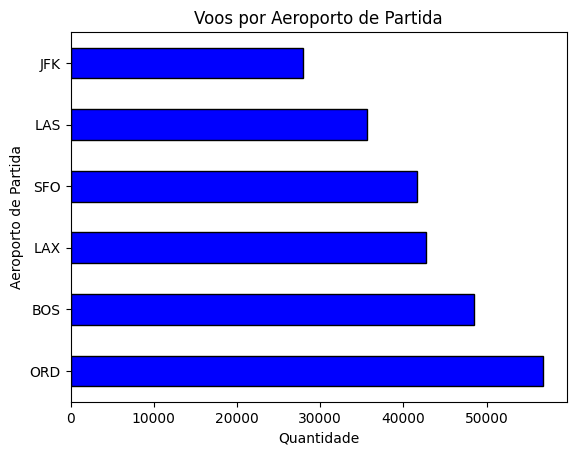

In [21]:
contagem_voos_aeroporto = df["Aeroporto Partida"].value_counts()

#criação do gráfico

contagem_voos_aeroporto.plot(kind="barh", edgecolor="black", color="blue")

plt.xlabel("Quantidade")
plt.ylabel("Aeroporto de Partida")
plt.title("Voos por Aeroporto de Partida")
plt.show()

In [22]:
Voo_mais_caro = df["Preco"].max()
Voo_mais_barato = df["Preco"].min()

print("Preço do voo mais caro: R$", Voo_mais_caro)
print("Preço do voo mais barato: R$ ", Voo_mais_barato)

Preço do voo mais caro: R$ 999.0
Preço do voo mais barato: R$  15.0


Text(0.5, 1.0, 'Custos das Passagens por Companhia')

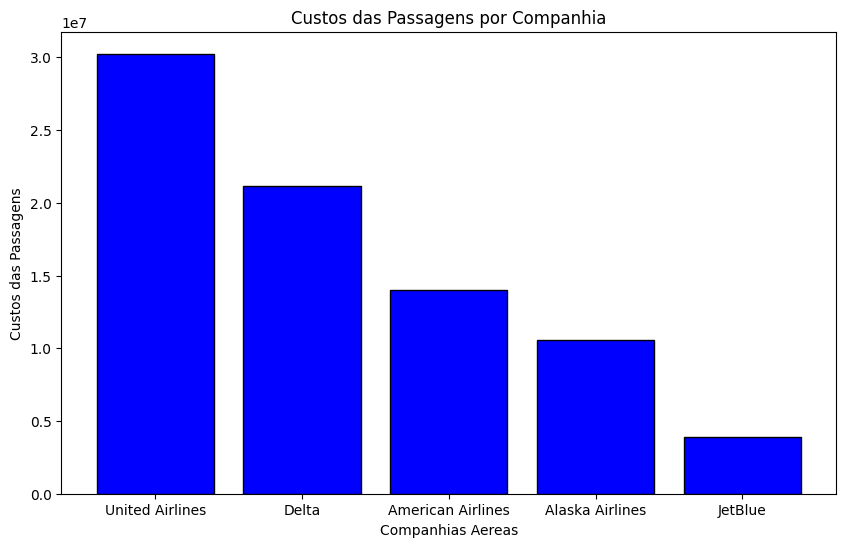

In [23]:
# Agrupa os custos por companhia aérea e traz as 5 com maior custo
custos_por_companhia = df.groupby("Companhia Aerea")["Preco"].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))  # Tamanho da figura
plt.bar(custos_por_companhia.index, custos_por_companhia.values, edgecolor="black", color="blue")
plt.xlabel("Companhias Aereas")
plt.ylabel("Custos das Passagens")
plt.title("Custos das Passagens por Companhia")

TESTE DE HIPÓTESE

H0 - O preço das passagens sem conexão é maior ao preço das passagens com conexão.
H1 - O preço das passagens sem conexão é menor do que o preço das passagens com conexão.

In [24]:
from scipy.stats import ttest_ind
import seaborn as sns

In [25]:
#amostras
sem_conexao = df[df['Numero de paradas']== 0]['Preco'].dropna()
com_conexao = df[df['Numero de paradas']>= 1]['Preco'].dropna()

#Teste T
estatistica_t, valor_p = ttest_ind(sem_conexao, com_conexao)

print("Teste Preco")
print(f"Estatistica T: {estatistica_t}")
print(f"Valor P: {valor_p}")

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula") 
    
     


Teste Preco
Estatistica T: -181.70854836475291
Valor P: 0.0
Rejeitamos a hipótese nula


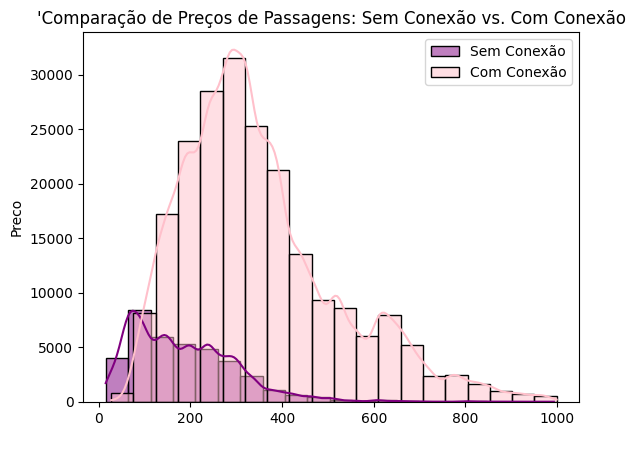

In [ ]:
# Filtra os dados para passagens sem e com conexão
df['Conexao'] = df['Numero de paradas'].apply(lambda x: 'Sem Conexão' if x == 0 else 'Com Conexão')

#grafico
sns.histplot(sem_conexao, color= 'purple', label = 'Sem Conexão', kde=True,  bins= 20)
sns.histplot(com_conexao, color= 'pink', label = 'Com Conexão', kde=True, bins= 20)

#rotulos
plt.legend()
plt.title("'Comparação de Preços de Passagens: Sem Conexão vs. Com Conexão")
plt.xlabel("Número de Paradas")
plt.ylabel("Preco")
plt.show()


In [ ]:
import sqlite3

In [ ]:

conn = sqlite3.connect(':memory:')


df.to_sql('df', conn, index=False, if_exists='replace')

query_sql = """
SELECT
Cabine,
SUM(Preco) as Preco


FROM df
WHERE [Companhia Aerea] == 'United Airlines'
GROUP BY Cabine;

"""

Preco_por_cabine = pd.read_sql_query(query_sql, conn)
print(Preco_por_cabine)


#fechar a conexão
conn.close()

            Cabine       Preco
0    Basic Economy   4032598.0
1   Business/First     36858.0
2          Economy  22503039.0
3     Economy Plus   3346715.0
4            First    275847.0
5  Premium Economy     51864.0
